A work in progress - beware, dragons!

Feynman-Kleinert-1986-PRA

Workbook to reimplement Feynman and Klenert's 1986 PRA "Effective classical partition function"

https://doi.org/10.1103/PhysRevA.34.5080

Effective classical partition functions. R. P. Feynman and H. Kleinert. Phys. Rev. A 34, 5080 – Published 1 December 1986

Errata

The form for the double well potential (page 34, RHS, third paragraph starting 'Another example is the double-well...'), should read

$V(x)=-\frac{1}{2} x^2 + \frac{1}{4} g x^4 + \frac{1}{4g}$.

Strangely this is correct in the captions of figure 2 and 3!

In [1]:
# Bring out the major leagues... https://www.youtube.com/watch?v=_E6DDktoPhg
using Optim

# Implementing optimisation / minimisation described in (6)
Pkg.status("Optim.jl") # I've probably pinned this to something weird.

 - Optim                         0.7.8              pinned.250b50ab.tmp


In [2]:
# Variables
# Potential energy g; either anharmonic strength or double-well setup
g=0.1976
# Thermodynamic Beta, natch
β=10

10

In [3]:
# Some kind of potential
# Double well potential as given in figure 2 + 3 captions
V(x,g)=-0.5*x^2 + 0.25*g*x^4 + 0.25/g

# Harmonic oscillator
#V(x,g)=0.5*x^2

# Anharmonic potential, following Kleinhert's book (p. 471); Also Figure 1 Feynman-Kleinert
#V(x,g)=x^2/2+x^4*g/4

V (generic function with 1 method)

In [4]:
using QuadGK
# (4) in Feynman and Kleinert
K(xp,x,a2,g)=1/sqrt(2*π*a2)*exp(-(x-xp)^2/(2*a2))*V(xp,g)
Va2(x,a2,g)=quadgk(xp->K(xp,x,a2,g), -Inf, +Inf) #, reltol=0, abstol=1e-5)

Va2 (generic function with 1 method)

Naively, (5) looks quite simple,

$\tilde W(x0,a2,Ω,g,β)=\frac{1}{β} ln( \frac{sinh(βΩ/2)}{(βΩ/2)} ) - \frac{Ω^2}{2}a^2 + V_{a2}(x0,a2,g)$ (5)

BUT - that sinh() in the core is quite nasty, as it explodes for large $\beta$ before being squished by the logarithm. However, numerically evaluating this can lead to infinite intermediates, and round-off to infinity! Not nice.

Since

$sinh(x)=\frac{1}{2} ( e^x - e^{-x} )$, 

we can take for large $\beta$, that $sinh(x)~=\frac{1}{2}e^x$, and therefore, 

$ln( \frac{sinh(x)}{x} ) \approx x - ln(2x)$.

Which is obviously a lot nicer!

In [5]:
# (5) naively as written, in Feynman and Kleinert
#Wtilde(x0,a2,Ω,g,β)=(1/β) * log( sinh(β*Ω/2)/(β*Ω/2) ) - (Ω^2/2) * a2 + Va2(x0,a2,g)[1]

# Large β limit; by taking sinh(x)=e^x-e^-x , and then dropping e^-x
#Wtilde(x0,a2,Ω,g,β)=(1/β) * (β*Ω/2 - log(β*Ω/2)) - (Ω^2/2) * a2 + Va2(x0,a2,g)[1]

# Branch depending on β; for accuracy + lack of infinities
function Wtilde(x0,a2,Ω,g,β)
    D=β*Ω/2
    if D>7.5
        F=(1/β) * (D - log(2*D))
    else
        F=(1/β)*( log(sinh(D)/D) )
    end
    V=Va2(x0,a2,g)[1]
    mid=(Ω^2/2) * a2
    return F-mid+V
end

# Expanded version of the above, reporting the decomposition
function verboseWtilde(x0,a2,Ω,g,β)
    D=β*Ω/2
    println("D=β*Ω/2 = $D")
    F= (1/β)*( log(sinh(D)) - log(D) )
    #F= (1/β)*( (log(2D)+D^2/6+D^4/180) - log(D) ) # generalised Puiseux series
    # Large D limit, through sinh(D) --> e^D [through away e^-D part]
    F = (1/β) * (D - log(2*D))
    V=Va2(x0,a2,g)[1]
    mid=(Ω^2/2) * a2
    println("Wtilde(x0=$x0,a2=$a2,Ω=$Ω,g=$g,β=$β) \n\t= F - mid + V")
    println("\t= $F - $mid + $V = ",F-mid+V)
    return F-mid+V
end

verboseWtilde(1.943,0.397,1.255,0.1976,β) # Kleinert's book, Table 5.1 p. 467, for g/4=0.5

verboseWtilde(0.0,0.1306,3.829,40.0,4000000)

D=β*Ω/2 = 6.2749999999999995
Wtilde(x0=1.943,a2=0.397,Ω=1.255,g=0.1976,β=10) 
	= F - mid + V
	= 0.3745279334422207 - 0.31264246249999994 + 0.3507256576575897 = 0.4126111285998104
D=β*Ω/2 = 7.658e6
Wtilde(x0=0.0,a2=0.1306,Ω=3.829,g=40.0,β=4000000) 
	= F - mid + V
	= 1.914495863897852 - 0.9573790373000001 + 0.45264080000000184 = 1.4097576265978538


1.4097576265978538

In [6]:
# Test the approximations used above... graphically like a physicist

using Plots

xrange=0.1:0.1:10

Fnaive(x)=log( sinh(x)/(x) )
Flarge(x)=x-log(2x)
plot!(ylim=(0.0,))
plot!(xlim=(0.0,))

plot(Fnaive,xrange,label="Fnaive")
plot!(Flarge,xrange,label="Flarge")



<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2.5 
 
 
 5.0 
 
 
 7.5 
 
 
 10.0 
 
 
 2 
 
 
 4 
 
 
 6 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,376.378 44.9535,376.115 50.5369,375.679 56.1203,375.07 61.7037,374.291 67.287,373.345 72.8704,372.236 78.4538,370.968 84.0372,369.544 89.6206,367.97 
 95.204,366.251 100.787,364.392 106.371,362.399 111.954,360.276 117.538,358.031 123.121,355.667 128.704,353.191 134.288,350.608 139.871,347.924 145.455,345.143 
 151.038,342.27 156.621,339.311 162.205,336.269 167.788,333.15 173.372,329.957 178.955,326.693 184.538,323.364 190.122,319.972 195.705,316.521 201.288,313.014 
 206.872,309.453 212.455,305.842 218.039,302.183 223.622,298.479 229.205,294.731 234.789,290.943 240.372,287.115 245.956,283.25 251.539,279.35 257.122,275.416 
 262.706,271.45 268.289,267.453 273.873,263.427 279.456,259.372 285.039,255.291 290.623,251.184 296.206,247.053 301.79,242.897 307.373,238.719 312.956,234.52 
 318.54,230.299 324.123,226.058 329.707,221.798 335.29,217.519 340.873,213.222 346.457,208.907 352.04,204.576 357.623,200.229 363.207,195.866 368.79,191.488 
 374.374,187.096 379.957,182.689 385.54,178.268 391.124,173.835 396.707,169.388 402.291,164.929 407.874,160.458 413.457,155.975 419.041,151.481 424.624,146.976 
 430.208,142.46 435.791,137.934 441.374,133.397 446.958,128.851 452.541,124.295 458.125,119.729 463.708,115.155 469.291,110.572 474.875,105.98 480.458,101.379 
 486.042,96.7704 491.625,92.1537 497.208,87.5292 502.792,82.897 508.375,78.2574 513.958,73.6105 519.542,68.9565 525.125,64.2956 530.709,59.6278 536.292,54.9534 
 541.875,50.2725 547.459,45.5852 553.042,40.8918 558.626,36.1922 564.209,31.4867 569.792,26.7753 575.376,22.0583 580.959,17.3356 586.543,12.6075 592.126,7.87402 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,286.508 44.9535,317.722 50.5369,333.797 56.1203,343.673 61.7037,350.154 67.287,354.486 72.8704,357.335 78.4538,359.1 84.0372,360.036 89.6206,360.318 
 95.204,360.071 100.787,359.388 106.371,358.337 111.954,356.975 117.538,355.343 123.121,353.477 128.704,351.405 134.288,349.15 139.871,346.733 145.455,344.17 
 151.038,341.475 156.621,338.661 162.205,335.738 167.788,332.715 173.372,329.601 178.955,326.402 184.538,323.126 190.122,319.777 195.705,316.362 201.288,312.883 
 206.872,309.346 212.455,305.755 218.039,302.112 223.622,298.42 229.205,294.683 234.789,290.903 240.372,287.083 245.956,283.224 251.539,279.328 257.122,275.398 
 262.706,271.435 268.289,267.441 273.873,263.417 279.456,259.364 285.039,255.285 290.623,251.179 296.206,247.048 301.79,242.894 307.373,238.716 312.956,234.517 
 318.54,230.297 324.123,226.056 329.707,221.796 335.29,217.518 340.873,213.221 346.457,208.907 352.04,204.576 357.623,200.229 363.207,195.866 368.79,191.488 
 374.374,187.095 379.957,182.689 385.54,178.268 391.124,173.835 396.707,169.388 402.291,164.929 407.874,160.458 413.457,155.975 419.041,151.481 424.624,146.976 
 430.208,142.46 435.791,137.934 441.374,133.397 446.958,128.851 452.541,124.295 458.125,119.729 463.708,115.155 469.291,110.572 474.875,105.98 480.458,101.379 
 486.042,96.7704 491.625,92.1537 497.208,87.5292 502.792,82.897 508.375,78.2574 513.958,73.6105 519.542,68.9565 525.125,64.2956 530.709,59.6278 536.292,54.9534 
 541.875,50.2725 547.459,45.5852 553.042,40.8918 558.626,36.1922 564.209,31.4867 569.792,26.7753 575.376,22.0583 580.959,17.3356 586.543,12.6075 592.126,7.87402 
 
 "/>
 
 
 
 
 Fnaive 
 
 
 
 Flarge

In [7]:
xrange=0.1:0.1:15

plot(x->abs(Flarge(x)-Fnaive(x)),xrange,label="Flarge-Fnaive")
#plot!(ylim=(0.1,10))
yaxis!("Error",:log10)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 10 
 
 
 - 
 
 
 10 
 
 
 10 
 
 
 - 
 
 
 5 
 
 
 10 
 
 
 0 
 
 
 Error 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 55.1181,7.87402 58.7222,13.0751 62.3263,17.0843 65.9303,20.5603 69.5344,23.7321 73.1385,26.7086 76.7426,29.5507 80.3467,32.2963 83.9507,34.9701 87.5548,37.5897 
 91.1589,40.1674 94.763,42.7123 98.3671,45.2315 101.971,47.7301 105.575,50.2125 109.179,52.6817 112.783,55.1403 116.387,57.5903 119.992,60.0334 123.596,62.4709 
 127.2,64.9038 130.804,67.333 134.408,69.7592 138.012,72.1829 141.616,74.6045 145.22,77.0245 148.824,79.4432 152.428,81.8608 156.032,84.2774 159.636,86.6934 
 163.241,89.1087 166.845,91.5235 170.449,93.9379 174.053,96.352 177.657,98.7659 181.261,101.179 184.865,103.593 188.469,106.006 192.073,108.419 195.677,110.832 
 199.281,113.245 202.885,115.658 206.489,118.071 210.094,120.484 213.698,122.897 217.302,125.309 220.906,127.722 224.51,130.135 228.114,132.548 231.718,134.96 
 235.322,137.373 238.926,139.786 242.53,142.198 246.134,144.611 249.738,147.023 253.342,149.436 256.947,151.849 260.551,154.261 264.155,156.674 267.759,159.087 
 271.363,161.499 274.967,163.912 278.571,166.324 282.175,168.737 285.779,171.15 289.383,173.562 292.987,175.975 296.591,178.387 300.196,180.8 303.8,183.213 
 307.404,185.625 311.008,188.038 314.612,190.451 318.216,192.863 321.82,195.276 325.424,197.688 329.028,200.101 332.632,202.514 336.236,204.926 339.84,207.339 
 343.444,209.751 347.049,212.164 350.653,214.577 354.257,216.989 357.861,219.402 361.465,221.814 365.069,224.227 368.673,226.64 372.277,229.052 375.881,231.465 
 379.485,233.878 383.089,236.29 386.693,238.703 390.298,241.115 393.902,243.528 397.506,245.941 401.11,248.353 404.714,250.766 408.318,253.178 411.922,255.591 
 415.526,258.004 419.13,260.416 422.734,262.829 426.338,265.241 429.942,267.654 433.546,270.067 437.151,272.479 440.755,274.892 444.359,277.305 447.963,279.717 
 451.567,282.13 455.171,284.542 458.775,286.955 462.379,289.367 465.983,291.78 469.587,294.193 473.191,296.605 476.795,299.018 480.4,301.431 484.004,303.843 
 487.608,306.256 491.212,308.668 494.816,311.08 498.42,313.494 502.024,315.907 505.628,318.319 509.232,320.731 512.836,323.143 516.44,325.557 520.044,327.97 
 523.648,330.381 527.253,332.794 530.857,335.211 534.461,337.614 538.065,340.033 541.669,342.449 545.273,344.862 548.877,347.264 552.481,349.694 556.085,352.103 
 559.689,354.534 563.293,356.917 566.897,359.368 570.502,361.739 574.106,364.175 577.71,366.493 581.314,368.982 584.918,371.487 588.522,373.873 592.126,376.378 
 
 "/>
 
 
 
 
 Flarge-Fnaive

In [8]:
println("V(0.0) = ",V(0.0,g))
println("Va2(0.0,5.0) = ",Va2(0.0,1.0,g))

V(0.0) = 1.2651821862348178
Va2(0.0,5.0) = (0.9133821862348174, 1.1458092767843961e-8)


In [9]:
using Plots

In [10]:
# OK, let's have a look our actors:
# V, the bare potential
# Va2, the Gaussian-smoothed potential
# Wtilde, the Auxillary potential, including partition function magic / failure

xrange=-3:0.1:3

plot(x->V(x,g),xrange,label="V") # bare [potential]

for a2 in 0.5 #:0.1:0.5 # Gaussian smearing widths to apply
   plot!(x->Va2(x,a2,g)[1],xrange,label="Va2, a2=$a2")
   plot!(x->Wtilde(x,a2,5,g,β),xrange,label="Wtilde, a2=$a2") # bare [potential]
end

#plot!(ylim=(0,1)) # force display
plot!()

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,81.5963 48.5827,95.5687 57.7953,106.919 67.0079,115.87 76.2205,122.635 85.4331,127.422 94.6457,130.428 103.858,131.846 113.071,131.859 122.283,130.641 
 131.496,128.361 140.709,125.179 149.921,121.246 159.134,116.707 168.346,111.698 177.559,106.348 186.772,100.778 195.984,95.1002 205.197,89.421 214.409,83.8374 
 223.622,78.4392 232.835,73.3081 242.047,68.5183 251.26,64.136 260.472,60.2198 269.685,56.8202 278.898,53.9803 288.11,51.7351 297.323,50.1119 306.535,49.1302 
 315.748,48.8016 324.961,49.1302 334.173,50.1119 343.386,51.7351 352.598,53.9803 361.811,56.8202 371.024,60.2198 380.236,64.136 389.449,68.5183 398.661,73.3081 
 407.874,78.4392 417.087,83.8374 426.299,89.421 435.512,95.1002 444.724,100.778 453.937,106.348 463.15,111.698 472.362,116.707 481.575,121.246 490.787,125.179 
 500,128.361 509.213,130.641 518.425,131.859 527.638,131.846 536.85,130.428 546.063,127.422 555.276,122.635 564.488,115.87 573.701,106.919 582.913,95.5687 
 592.126,81.5963 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,7.87402 48.5827,27.5975 57.7953,44.5041 67.0079,58.8159 76.2205,70.7474 85.4331,80.5053 94.6457,88.2884 103.858,94.2878 113.071,98.6867 122.283,101.661 
 131.496,103.377 140.709,103.996 149.921,103.67 159.134,102.542 168.346,100.75 177.559,98.422 186.772,95.6786 195.984,92.6332 205.197,89.3909 214.409,86.0493 
 223.622,82.698 232.835,79.419 242.047,76.2863 251.26,73.3661 260.472,70.7171 269.685,68.3898 278.898,66.4272 288.11,64.8643 297.323,63.7285 306.535,63.0392 
 315.748,62.8081 324.961,63.0392 334.173,63.7285 343.386,64.8643 352.598,66.4272 361.811,68.3898 371.024,70.7171 380.236,73.3661 389.449,76.2863 398.661,79.419 
 407.874,82.698 417.087,86.0493 426.299,89.3909 435.512,92.6332 444.724,95.6786 453.937,98.422 463.15,100.75 472.362,102.542 481.575,103.67 490.787,103.996 
 500,103.377 509.213,101.661 518.425,98.6867 527.638,94.2878 536.85,88.2884 546.063,80.5053 555.276,70.7474 564.488,58.8159 573.701,44.5041 582.913,27.5975 
 592.126,7.87402 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3da44d; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,280.256 48.5827,299.979 57.7953,316.886 67.0079,331.198 76.2205,343.129 85.4331,352.887 94.6457,360.67 103.858,366.669 113.071,371.068 122.283,374.042 
 131.496,375.759 140.709,376.378 149.921,376.052 159.134,374.924 168.346,373.132 177.559,370.804 186.772,368.06 195.984,365.015 205.197,361.773 214.409,358.431 
 223.622,355.08 232.835,351.801 242.047,348.668 251.26,345.748 260.472,343.099 269.685,340.771 278.898,338.809 288.11,337.246 297.323,336.11 306.535,335.421 
 315.748,335.19 324.961,335.421 334.173,336.11 343.386,337.246 352.598,338.809 361.811,340.771 371.024,343.099 380.236,345.748 389.449,348.668 398.661,351.801 
 407.874,355.08 417.087,358.431 426.299,361.773 435.512,365.015 444.724,368.06 453.937,370.804 463.15,373.132 472.362,374.924 481.575,376.052 490.787,376.378 
 500,375.759 509.213,374.042 518.425,371.068 527.638,366.669 536.85,360.67 546.063,352.887 555.276,343.129 564.488,331.198 573.701,316.886 582.913,299.979 
 592.126,280.256 
 "/>
 
 
 
 
 V 
 
 
 
 Va2, a2=0.5 
 
 
 
 Wtilde, a2=0.5

In [11]:
g=0.4
β=10

@printf("Wtilde(x0,a2,Ω,g=%f,β=%f)\n",g,β)

@printf("a2\\Ω")
for Ω in 0.1:0.2:2.0
    @printf(" %.3f",Ω)
end

for a2 in 0.1:0.1:2.0
    @printf("\n a2=%.3f",a2)
    for Ω in 0.1:0.2:2.0
        @printf(" %.3f",Wtilde(0.0,a2,Ω,g,β))
    end
end

Wtilde(x0,a2,Ω,g=0.400000,β=10.000000)
a2\Ω 0.100 0.300 0.500 0.700 0.900 1.100 1.300 1.500 1.700 1.900
 a2=0.100 0.582 0.609 0.654 0.709 0.768 0.828 0.887 0.945 1.000 1.053
 a2=0.200 0.540 0.563 0.600 0.643 0.686 0.726 0.762 0.791 0.815 0.832
 a2=0.300 0.505 0.524 0.553 0.584 0.611 0.631 0.642 0.644 0.635 0.616
 a2=0.400 0.475 0.490 0.511 0.530 0.541 0.541 0.529 0.502 0.462 0.407
 a2=0.500 0.452 0.463 0.476 0.483 0.478 0.458 0.421 0.367 0.294 0.203
 a2=0.600 0.434 0.441 0.446 0.441 0.420 0.380 0.320 0.237 0.133 0.006
 a2=0.700 0.423 0.426 0.423 0.406 0.369 0.309 0.224 0.114 -0.023 -0.186
 a2=0.800 0.417 0.416 0.405 0.376 0.323 0.243 0.135 -0.004 -0.172 -0.371
 a2=0.900 0.418 0.413 0.394 0.353 0.284 0.184 0.051 -0.115 -0.316 -0.551
 a2=1.000 0.424 0.415 0.388 0.335 0.250 0.130 -0.026 -0.221 -0.453 -0.724
 a2=1.100 0.437 0.424 0.389 0.324 0.223 0.083 -0.098 -0.320 -0.585 -0.892
 a2=1.200 0.455 0.438 0.395 0.318 0.201 0.041 -0.163 -0.414 -0.710 -1.053
 a2=1.300 0.480 0.459 0.408 0.319 0.

In [12]:
# Replot fits from Feynman-Kleinert Table II
# - basically checking whether the Wtilde equation is reporting correctly, 
# and whether (as described in the caption) only Wtilde for g=0.1976 has double well structure 

@printf("Feynman-Kleinert Table II reads:\n g      E0=Wtilde\n 0.1976 0.650 \n 0.4    0.549 \n 4.0    0.598 \n 40.0   1.409\n")

β=3000
# Much higher than this, and results collapse to Inf. But essentially agrees with Table II now!

# Wtilde(x0,a2,Ω)
xrange=-4:0.1:4
# These values, from Feynman and Kleinhert, table II
g=0.1976
@printf("\n%f %f",g,Wtilde(1.943,0.397,1.255,g,β))
plot(x->Wtilde(x,0.397,1.255,g,β),xrange,label="g=0.1976") 

g=0.4
@printf("\n%f %f",g,Wtilde(0.0,1.030,0.486,g,β))
plot!(x->Wtilde(x,1.030,0.486,g,β),xrange,label="g=0.4") 

g=4.0
@printf("\n%f %f",g,Wtilde(0.0,0.3059,1.634,g,β))
plot!(x->Wtilde(x,0.3059,1.634,g,β),xrange,label="g=4.0")

g=40.0
@printf("\n%f %f",g,Wtilde(0.0,0.1306,3.829,g,β))
plot!(x->Wtilde(x,0.1306,3.829,g,β),xrange,label="g=40.0")


plot!(ylim=(-2,10)) # force plot in notebook


Feynman-Kleinert Table II reads:
 g      E0=Wtilde
 0.1976 0.650 
 0.4    0.549 
 4.0    0.598 
 40.0   1.409

0.197600 0.662839
0.400000 0.547201
4.000000 0.596072
40.000000 1.406645

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 -2 
 
 
 0 
 
 
 2 
 
 
 4 
 
 
 6 
 
 
 8 
 
 
 10 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,71.4015 46.2795,99.5294 53.189,125.123 60.0984,148.322 67.0079,169.264 73.9173,188.081 80.8268,204.903 87.7362,219.855 94.6457,233.059 101.555,244.633 
 108.465,254.692 115.374,263.348 122.283,270.707 129.193,276.873 136.102,281.947 143.012,286.024 149.921,289.199 156.831,291.559 163.74,293.191 170.65,294.176 
 177.559,294.594 184.469,294.517 191.378,294.018 198.287,293.163 205.197,292.017 212.106,290.639 219.016,289.087 225.925,287.412 232.835,285.664 239.744,283.888 
 246.654,282.126 253.563,280.417 260.472,278.795 267.382,277.291 274.291,275.932 281.201,274.743 288.11,273.742 295.02,272.947 301.929,272.37 308.839,272.02 
 315.748,271.902 322.657,272.02 329.567,272.37 336.476,272.947 343.386,273.742 350.295,274.743 357.205,275.932 364.114,277.291 371.024,278.795 377.933,280.417 
 384.843,282.126 391.752,283.888 398.661,285.664 405.571,287.412 412.48,289.087 419.39,290.639 426.299,292.017 433.209,293.163 440.118,294.018 447.028,294.517 
 453.937,294.594 460.846,294.176 467.756,293.191 474.665,291.559 481.575,289.199 488.484,286.024 495.394,281.947 502.303,276.873 509.213,270.707 516.122,263.348 
 523.031,254.692 529.941,244.633 536.85,233.059 543.76,219.855 550.669,204.903 557.579,188.081 564.488,169.264 571.398,148.322 578.307,125.123 585.217,99.5294 
 592.126,71.4015 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,-545.963 46.2795,-467.385 53.189,-394.486 60.0984,-326.98 67.0079,-264.593 73.9173,-207.054 80.8268,-154.103 87.7362,-105.485 94.6457,-60.9527 101.555,-20.2671 
 108.465,16.8041 115.374,50.4856 122.283,80.995 129.193,108.542 136.102,133.33 143.012,155.553 149.921,175.401 156.831,193.052 163.74,208.682 170.65,222.454 
 177.559,234.528 184.469,245.056 191.378,254.18 198.287,262.036 205.197,268.755 212.106,274.457 219.016,279.257 225.925,283.262 232.835,286.571 239.744,289.276 
 246.654,291.462 253.563,293.207 260.472,294.58 267.382,295.644 274.291,296.454 281.201,297.059 288.11,297.498 295.02,297.806 301.929,298.007 308.839,298.12 
 315.748,298.157 322.657,298.12 329.567,298.007 336.476,297.806 343.386,297.498 350.295,297.059 357.205,296.454 364.114,295.644 371.024,294.58 377.933,293.207 
 384.843,291.462 391.752,289.276 398.661,286.571 405.571,283.262 412.48,279.257 419.39,274.457 426.299,268.755 433.209,262.036 440.118,254.18 447.028,245.056 
 453.937,234.528 460.846,222.454 467.756,208.682 474.665,193.052 481.575,175.401 488.484,155.553 495.394,133.33 502.303,108.542 509.213,80.995 516.122,50.4856 
 523.031,16.8041 529.941,-20.2671 536.85,-60.9527 543.76,-105.485 550.669,-154.103 557.579,-207.054 564.488,-264.593 571.398,-326.98 578.307,-394.486 585.217,-467.385 
 592.126,-545.963 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#3da44d; stroke-width:1; stroke-opacity:1; fill:none" points="
 39.3701,-8220.89 46.2795,-7431.35 53.189,-6698.68 60.0984,-6020.05 67.0079,-5392.69 73.9173,-4813.91 80.8268,-4281.11 87.7362,-3791.73 94.6457,-3343.31 101.555,-2933.44 
 108.465,-2559.82 115.374,-2220.19 122.283,-1912.38 129.193,-1634.28 136.102,-1383.87 143.012,-1159.2 149.921,-958.392 156.831,-779.632 163.74,-621.193 170.65,-481.416 
 177.559,-358.716 184.469,-251.582 191.378,-158.578 198.287,-78.3399 205.197,-9.5776 212.106,48.9247 219.016,98.3093 225.925,139.645 232.835,173.927 239.744,202.075 
 246.654,224.939 253.563,243.291 260.472,257.832 267.382,269.189 274.291,277.913 281.201,284.485 288.11,289.309 295.02,292.717 301.929,294.967 308.839,296.243 
 315.748,296.656 322.657,296.243 329.567,294.967 336.476,292.717 343.386,289.309 350.295,284.485 357.205,277.913 364.114,269.189 371.024,257.832 37

In [13]:
# Wtilde(x0,a2,Ω)
g=0.1976
β=300
myf(x) = Wtilde(0.0,x[1],x[2],g,β)

lower=[0.0,0.0]
upper=[10.0,10.0]
initial=[1.0,1.0]

res=optimize(OnceDifferentiable(myf), 
    initial, lower, upper, Fminbox(); 
    optimizer=ConjugateGradient, 
    optimizer_o=(Optim.Options(autodiff=true)) )

Results of Optimization Algorithm
 * Algorithm: Fminbox with Conjugate Gradient
 * Starting Point: [1.0,1.0]
 * Minimizer: [9.999999999988574,9.999999999994541]
 * Minimum: -4.839415e+02
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 507
 * Gradient Calls: 420

In [14]:
myf((0.2,0.3))

1.2971108206665964

In [15]:
function W(x0,g,β)
    println("W(x0=$x0,g=$g,β=$β)")
    myf(x)=Wtilde(x0,x[1],x[2],g,β)
    
    lower=[0.0,0.0]
    upper=[5.0,5.0]
    initial=[1.0,1.0]

    res=optimize(OnceDifferentiable(myf), 
        initial, lower, upper, Fminbox(); 
        optimizer=GradientDescent, 
        optimizer_o=(Optim.Options(autodiff=true,allow_f_increases=true)) )
    minimum=Optim.minimum(res)
    show(res)
    return minimum
end

# Vaguely trying to produce plateau values on Fig 2; and figures in Tab II
β=10
for g in [0.1976, 0.4,0.4,40]
    @printf("\ng=%f β=%f, W(0.0,g,β)= %f",g,β,W(0.0,g,β))
end

W(x0=0.0,g=0.1976,β=10)
Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [1.0,1.0]
 * Minimizer: [4.9999999999999485,4.999999999999976]
 * Minimum: -5.792102e+01
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 167
 * Gradient Calls: 167
g=0.197600 β=10.000000, W(0.0,g,β)= -57.921020W(x0=0.0,g=0.4,β=10)
Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [1.0,1.0]
 * Minimizer: [4.999999999960002,4.999999999983688]
 * Minimum: -5.476620e+01
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 156
 * Gradient Cal

In [16]:
# Let's try and use (7) to fix everything

# function Wtilde(x0,a2,Ω,g,β)

function W(x0,g,β)
    #println("W(x0=$x0,g=$g,β=$β)")
    
    a2(Ω)=1/(β*Ω^2)*( (β*Ω)/2 * coth(β*Ω/2)-1 ) #(7)
    myf(x)=Wtilde(x0,a2(x[1]),x[1],g,β)
    
    lower=[0.0]
    upper=[5.0]
    initial=[1.0]

    res=optimize(OnceDifferentiable(myf), 
        initial, lower, upper, Fminbox(); 
        optimizer=GradientDescent, 
        optimizer_o=(Optim.Options(autodiff=true,allow_f_increases=true)) )
    minimum=Optim.minimum(res)
    Ω=Optim.minimizer(res)[1]
    mya2=a2(Ω)[1]
    #println("Optimised for W(x0=$x0,g=$g,β=$β). \n\tΩ=$Ω, a2=$mya2, minimum=$minimum.")
    #show(res)
    return minimum
end

# Vaguely trying to produce plateau values on Fig 2; and figures in Tab II
β=1000
for g in [0.1976, 0.4,4.0,40]
    #@printf("\ng=%f β=%f, W(0.0,g,β)= %f",g,β,W(0.0,g,β))
    W(0.0,g,β)
end


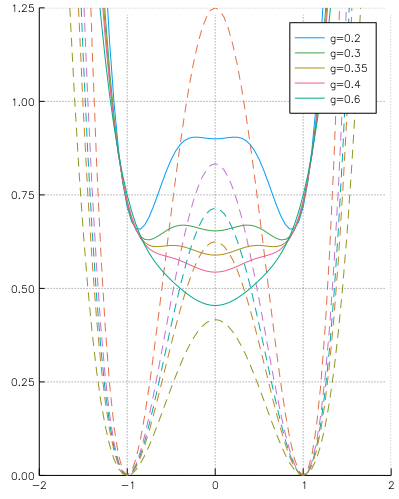

In [29]:
# Try and reproduce Fig 3; Double-well for varying g.

g=0.1976
β=1000

xrange=-2:0.05:2
#Ws=[ W(x,g,β) for x in xrange ]
#println(Ws)
#plot(Ws,xrange,label="W(x)")

plot(size=(400,500),fmt=:png) # force aspect ratio; 
    # use PNG as changing size seems to break whatever the default is (SVG?)
for g in [.2, .3,.35,.4,.6] # straight lines in Fig 3.
    plot!(x->W(x/sqrt(g),g,β), xrange, label="g=$g") 
        # Note scaling of x-range within fn. argument
    plot!(x->V(x/sqrt(g),g), xrange, label="", linestyle = :dash) 
        # Bare potential = inf.T
end

plot!(ylim=(0,1.25)) # same as Fig 3 scale


In [18]:
β

100

In [19]:
sinh(700)

5.0711602736750225e303